In [1]:
!pip install tensorflow numpy pandas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


---

# Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Plotting a sample

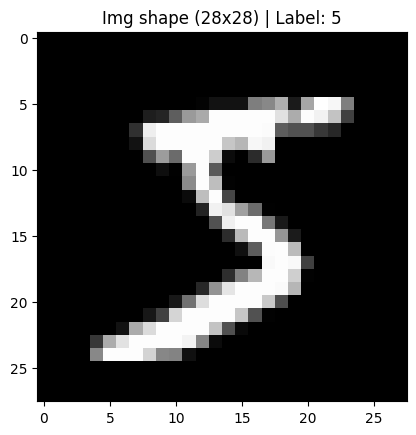

In [5]:
sample_idx = 0

plt.imshow(x_train[sample_idx], cmap='gray')
plt.title(f'Img shape ({x_train[sample_idx].shape[0]}x{x_train[sample_idx].shape[1]}) | Label: {y_train[sample_idx]}')
plt.show()

## One-hot Encoding the labels

In [6]:
y_train_oh = keras.utils.to_categorical(y_train, num_classes=10)
y_test_oh = keras.utils.to_categorical(y_test, num_classes=10)

## Flattening images

In [7]:
fltn = Flatten()

x_train = fltn(x_train)
x_test  = fltn(x_test)

## Normalizing input

In [8]:
x_train = x_train/255
x_test = x_test/255

---

# Neural Network

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=len(x_train[0])))
model.add(Dense(10, activation='softmax', input_dim=512))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        keras.metrics.CategoricalAccuracy(name='Accuracy'),
        keras.metrics.Precision(name='Precision'),
        keras.metrics.Recall(name='Recall'),
        keras.metrics.F1Score(name='F1', average='micro'),
    ]
)

model.summary()

c:\Users\12ped\anaconda3\envs\MLENG\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    x=x_train,
    y=y_train_oh,
    batch_size=50,
    epochs=100,
    shuffle=True,
    validation_data=(x_test, y_test_oh)
)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8975 - F1: 0.8975 - Precision: 0.9428 - Recall: 0.8449 - loss: 0.3606 - val_Accuracy: 0.9689 - val_F1: 0.9689 - val_Precision: 0.9737 - val_Recall: 0.9633 - val_loss: 0.1041
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9734 - F1: 0.9734 - Precision: 0.9785 - Recall: 0.9700 - loss: 0.0883 - val_Accuracy: 0.9757 - val_F1: 0.9757 - val_Precision: 0.9790 - val_Recall: 0.9728 - val_loss: 0.0796
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9835 - F1: 0.9835 - Precision: 0.9862 - Recall: 0.9816 - loss: 0.0540 - val_Accuracy: 0.9760 - val_F1: 0.9760 - val_Precision: 0.9791 - val_Recall: 0.9736 - val_loss: 0.0755
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9887 - F1: 0.9887 - Precision: 0.9901 - Recall: 0.9872 - loss: 0.0369 - val_Accuracy: 0.9786 - val_F1: 0.9786 - val_Precision: 0.9808 - val_Recall: 0.9764 - val_loss: 0.0693
Epoch 5/100
1200/1200 ━━━━━━

In [11]:
h_df = pd.DataFrame(history.history)

h_df

,Accuracy,F1,Precision,Recall,loss,val_Accuracy,val_F1,val_Precision,val_Recall,val_loss
0,0.937333,0.937333,0.956946,0.917583,2.151183e-01,0.9689,0.9689,0.973719,0.9633,0.104127
1,0.973667,0.973667,0.978225,0.970350,8.616719e-02,0.9757,0.9757,0.978967,0.9728,0.079628
2,0.982883,0.982883,0.985399,0.980833,5.615303e-02,0.9760,0.9760,0.979083,0.9736,0.075455
3,0.987683,0.987683,0.989168,0.986283,3.915716e-02,0.9786,0.9786,0.980814,0.9764,0.069273
4,0.991717,0.991717,0.992668,0.990600,2.804602e-02,0.9780,0.9780,0.980140,0.9772,0.067291
...,...,...,...,...,...,...,...,...,...,...
95,1.000000,1.000000,1.000000,1.000000,7.861027e-06,0.9838,0.9838,0.983897,0.9837,0.188387
96,1.000000,1.000000,1.000000,1.000000,9.436796e-07,0.9840,0.9840,0.984195,0.9839,0.187762
97,1.000000,1.000000,1.000000,1.000000,4.854028e-07,0.9844,0.9844,0.984495,0.9842,0.187433
98,1.000000,1.000000,1.000000,1.000000,3.218745e-07,0.9845,0.9845,0.984597,0.9844,0.187131


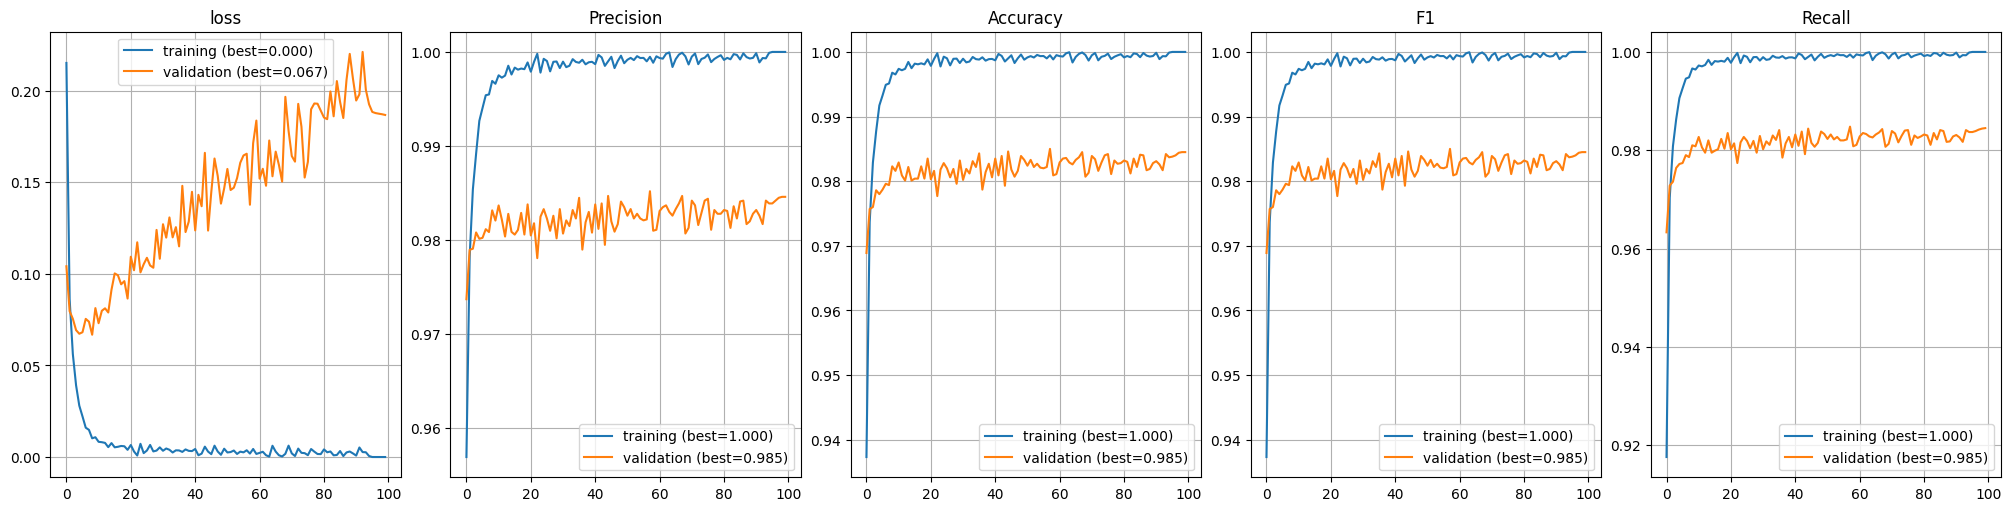

In [12]:
metrics = set([k.split('_')[-1] for k in history.history.keys()])

fig, axs = plt.subplots(ncols=len(metrics), nrows=1, constrained_layout=True, figsize=(20,5))

for plot_idx, metric in enumerate(metrics):
    best = h_df.max(0) if metric != 'loss' else h_df.min(0)
    axs[plot_idx].plot(
        history.history[metric],
        label=f'training (best={best[metric]:.3f})'
    )
    axs[plot_idx].plot(
        history.history['val_'+metric],
        label=f'validation (best={best["val_"+metric]:.3f})'
    )
    axs[plot_idx].grid(True)
    axs[plot_idx].set_title(metric)
    axs[plot_idx].legend()
